In [1]:
import pandas as pd


 Load the dataset


In [2]:
df = pd.read_csv('chatboat_performance.csv')


#### Convert StartTime and EndTime to datetime


In [3]:
df['StartTime'] = pd.to_datetime(df['StartTime'])
df['EndTime'] = pd.to_datetime(df['EndTime'])

#### Calculate additional columns


In [4]:
df['SessionDuration'] = (df['EndTime'] - df['StartTime']).dt.total_seconds() / 60  # Duration in minutes


#### Calculate key performance indicators (KPIs):

In [5]:
total_chats = len(df)
successful_chats = df['SuccessfulChats'].sum()
failed_chats = df['FailedChats'].sum()
escalated_chats = df['EscalatedChats'].sum()

In [6]:
success_rate = (successful_chats / total_chats) * 100
drop_off_rate = ((failed_chats + escalated_chats) / total_chats) * 100
escalation_rate = (escalated_chats / total_chats) * 100
average_session_duration = df['SessionDuration'].mean()
user_retention = df['UserRetention'].mean() * 100

In [7]:
print(f"Success Rate: {success_rate:.2f}%")
print(f"Drop-off Rate: {drop_off_rate:.2f}%")
print(f"Escalation Rate: {escalation_rate:.2f}%")
print(f"Average Session Duration: {average_session_duration:.2f} minutes")
print(f"User Retention: {user_retention:.2f}%")

Success Rate: 53.12%
Drop-off Rate: 46.88%
Escalation Rate: 12.50%
Average Session Duration: 20.34 minutes
User Retention: 70.31%


#### Analyze Trends Over Time


 Group by day


In [8]:
df['Date'] = df['StartTime'].dt.date
daily_stats = df.groupby('Date').agg({
    'SuccessfulChats': 'sum',
    'FailedChats': 'sum',
    'EscalatedChats': 'sum',
    'SessionDuration': 'mean'
}).reset_index()


Calculate daily success rate, drop-off rate, and escalation rate


In [9]:
daily_stats['TotalChats'] = daily_stats[['SuccessfulChats', 'FailedChats', 'EscalatedChats']].sum(axis=1)
daily_stats['SuccessRate'] = (daily_stats['SuccessfulChats'] / daily_stats['TotalChats']) * 100
daily_stats['DropOffRate'] = ((daily_stats['FailedChats'] + daily_stats['EscalatedChats']) / daily_stats['TotalChats']) * 100
daily_stats['EscalationRate'] = (daily_stats['EscalatedChats'] / daily_stats['TotalChats']) * 100


#### Identify Bottlenecks or Points of Failure


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


 Visualizing success rate:

Text(0, 0.5, 'Success Rate (%)')

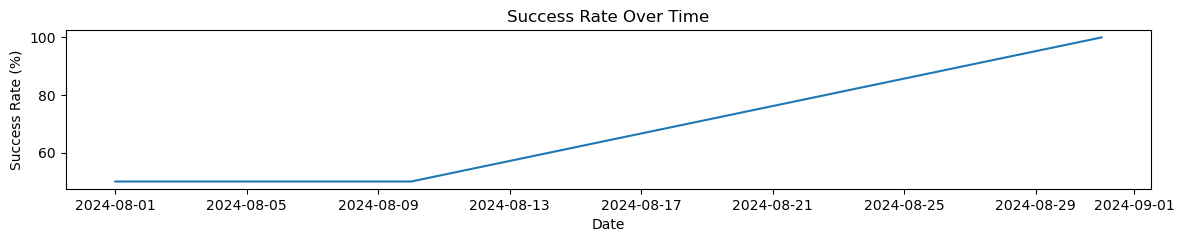

In [11]:
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
sns.lineplot(x='Date', y='SuccessRate', data=daily_stats)
plt.title('Success Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Success Rate (%)')


Visualizing drop-off rate

Text(0, 0.5, 'Drop-off Rate (%)')

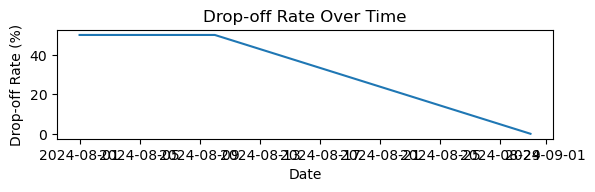

In [12]:
plt.subplot(3, 1, 2)
sns.lineplot(x='Date', y='DropOffRate', data=daily_stats)
plt.title('Drop-off Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Drop-off Rate (%)')

Visualizing escalation rate over time

Text(0, 0.5, 'Escalation Rate (%)')

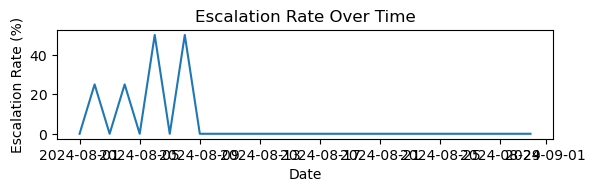

In [14]:
plt.subplot(3, 1, 3)
sns.lineplot(x='Date', y='EscalationRate', data=daily_stats)
plt.title('Escalation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Escalation Rate (%)')

#### Generate a Dashboards


In [16]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=daily_stats['Date'], y=daily_stats['SuccessRate'],
                         mode='lines+markers', name='Success Rate'))
fig.add_trace(go.Scatter(x=daily_stats['Date'], y=daily_stats['DropOffRate'],
                         mode='lines+markers', name='Drop-off Rate'))
fig.add_trace(go.Scatter(x=daily_stats['Date'], y=daily_stats['EscalationRate'],
                         mode='lines+markers', name='Escalation Rate'))

fig.update_layout(title='Chatbot Performance Metrics Over Time',
                  xaxis_title='Date',
                  yaxis_title='Percentage',
                  template='plotly_dark')

fig.show()


 Heatmap of chat volume by hour and day


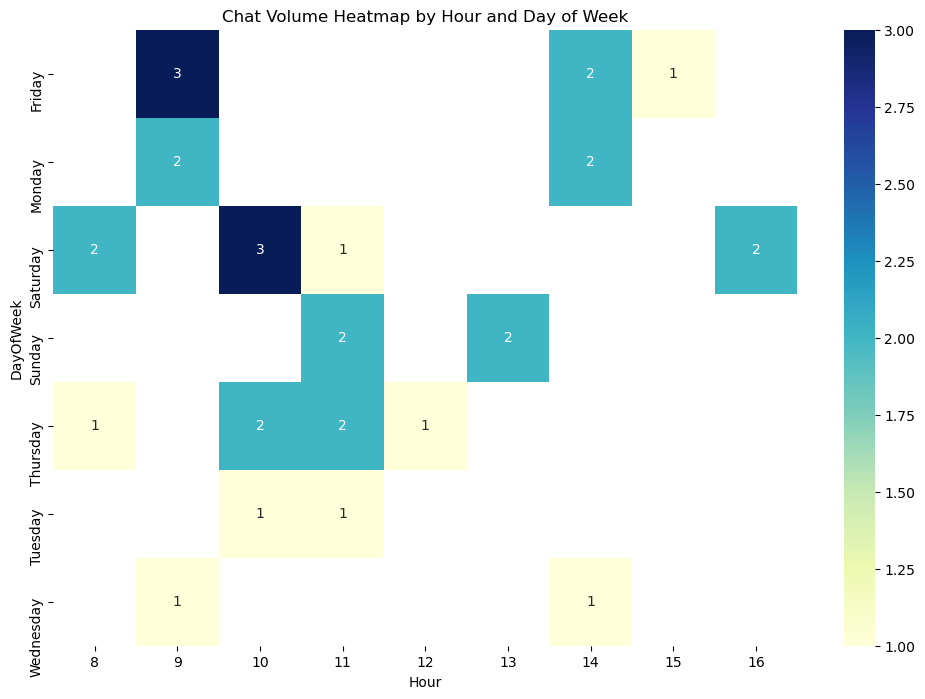

In [18]:
df['Hour'] = df['StartTime'].dt.hour
df['DayOfWeek'] = df['StartTime'].dt.day_name()

heatmap_data = df.groupby(['DayOfWeek', 'Hour']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, )
plt.title('Chat Volume Heatmap by Hour and Day of Week')
plt.show()


Correlation matrix

In [19]:
correlation = df[['SuccessfulChats', 'FailedChats', 'EscalatedChats', 'SessionDuration']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Chatbot Metrics')
plt.show()